# **Exploratory Data**

In [2]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Explorasi Data Customers

In [3]:
customers_df = pd.read_csv('customers.csv')
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [4]:
customers_df.describe(include='all')

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1007.000000,1007,989,1007.000000,1007,1007.000000,1007,1007,1007
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 808,Prefer not to say,NaN,4277 Ryan IslandSuite 792,NaN,Robertstown,South Australia,Australia
freq,NaN,3,731,NaN,3,NaN,3,140,1007
mean,501.726912,NaN,NaN,50.929494,NaN,5012.538232,NaN,NaN,NaN
std,288.673238,NaN,NaN,30.516299,NaN,2885.836112,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,252.500000,NaN,NaN,34.000000,NaN,2403.500000,NaN,NaN,NaN
50%,502.000000,NaN,NaN,50.000000,NaN,5087.000000,NaN,NaN,NaN
75%,751.500000,NaN,NaN,65.000000,NaN,7493.500000,NaN,NaN,NaN


In [5]:
customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"]
})

customer_id  age                          
                      nunique  max min       mean        std
gender                                                      
Female                    115   79  20  49.147826  16.646607
Male                      143   80  20  51.230769  18.462635
Prefer not to say         725  700  20  51.203830  34.145351

In [6]:
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)


city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64

In [7]:
customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

## Exsplorasi Data Orders

In [8]:
order_df = pd.read_csv("orders.csv")
order_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [9]:
order_df.describe(include='all')

,order_id,customer_id,payment,order_date,delivery_date
count,1000.000000,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,NaN,291,305
top,NaN,NaN,NaN,2021-6-20,2021-08-09
freq,NaN,NaN,NaN,10,9
mean,500.500000,506.640000,33972.936000,NaN,NaN
std,288.819436,277.115502,14451.609047,NaN,NaN
min,1.000000,1.000000,10043.000000,NaN,NaN
25%,250.750000,275.250000,21329.250000,NaN,NaN
50%,500.500000,515.000000,33697.500000,NaN,NaN
75%,750.250000,737.250000,46249.000000,NaN,NaN


In [10]:
datetime_columns = ["order_date", "delivery_date"]
for colums in datetime_columns:
    order_df[colums] = pd.to_datetime(order_df[colums])


In [11]:
delivery_time = order_df["delivery_date"] - order_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["delivery_time"] = round(delivery_time/86400)

In [12]:
order_df.describe()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


In [13]:
order_df.groupby(by= "order_date").order_id.nunique().sort_values(ascending=False).head(5)

order_date
2021-06-20    10
2021-07-07     9
2021-04-25     9
2021-06-21     9
2021-03-22     8
Name: order_id, dtype: int64

## Eksplorasi Data orders dan customers

In [14]:
customer_id_in_orders_df =  order_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
440,440,fulan 440,Prefer not to say,64,78 Bella CrestSuite 010,5404,Andrewmouth,Queensland,Australia,Non Active
568,567,fulan 567,Female,39,3767 Mackenzie Estate DrApt. 877,7008,East Piper,Northern Territory,Australia,Active
546,546,fulan 546,Prefer not to say,47,12 Toby WayApt. 990,4797,Emilyfort,Queensland,Australia,Non Active
67,68,fulan 68,Female,23,373 Little JunctionApt. 299,6751,West Justin,Western Australia,Australia,Active
21,22,fulan 22,Prefer not to say,20,292 Casper IslandSuite 778,6624,Maxberg,Victoria,Australia,Active


In [15]:
customers_df.groupby(by="status").customer_id.sum().sort_values(ascending=False).reset_index()

,status,customer_id
0,Active,312982
1,Non Active,192257


In [16]:
orders_customers_df = pd.merge(
    left=order_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


In [17]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


In [18]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False)

state
South Australia                 148
Queensland                      139
Western Australia               130
New South Wales                 129
Australian Capital Territory    118
Victoria                        118
Tasmania                        112
Northern Territory              106
Name: order_id, dtype: int64

In [19]:
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

age_group
Adults     681
Seniors    226
Youth       93
Name: order_id, dtype: int64

## Eksplorasi Data product dan sales

In [20]:
product_df = pd.read_csv('products.csv')
sales_df = pd.read_csv('sales.csv')


In [21]:
product_df.describe(include='all')


,product_id,product_type,product_name,size,colour,price,quantity,description
count,1266.000000,1266,1266,1266,1266,1266.000000,1266.000000,1266
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,S,orange,NaN,NaN,"A orange coloured, S sized, Linen Shirt"
freq,NaN,424,70,253,182,NaN,NaN,3
mean,627.926540,NaN,NaN,NaN,NaN,105.812006,60.138231,NaN
std,363.971586,NaN,NaN,NaN,NaN,9.715611,11.682791,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,313.250000,NaN,NaN,NaN,NaN,95.250000,50.000000,NaN
50%,626.500000,NaN,NaN,NaN,NaN,109.000000,60.000000,NaN
75%,942.750000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [22]:
sales_df.describe(include='all')

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [23]:
product_df.groupby(by='product_type').agg({
    'product_id': 'nunique',
    'quantity': 'sum',
    'price': ['min','max']
})


product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25527    90  119
Shirt               420    25469    92  119
Trousers            420    25139    90  119

In [24]:
product_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity":"sum",
    "price": ["max",'sum']
})

product_id quantity price      
                     nunique      sum   max   sum
product_name                                     
Bomber                    35     2162    90  3240
Camp Collared             35     2071   112  3920
Cardigan                  35     2032   118  4130
Cargo Pants               35     2146   106  3710
Casual Slim Fit           35     2086   113  3955
Chambray                  35     2020   105  3675
Chinos                    35     2101   100  3500
Coach                     35     2158   115  4025
Cords                     35     2260   113  3955
Cropped                   35     2085    99  3465
Cuban Collar              35     2017    93  3255
Denim                     70     4204   115  7245
Drawstring                35     2042   104  3640
Dress                     35     2177   119  4284
Flannel                   35     2135    96  3360
Henley                    35     2121    92  3312
High-Waisted              35     2198    98  3430
Joggers                   35     2107    94  3290
Leather                   35     2276   113  3955
Linen                     35     2222   116  4292
Mandarin Collar           35     2203   108  3780
Oxford Cloth              35     2071   114  3990
Parka                     35     2201   119  4165
Peacoat                   35     2067   102  3570
Pleated                   35     2030    90  3150
Polo                      35     2196   117  4095
Puffer                    35     2007   110  3960
Pullover                  35     2184   114  3990
Relaxed Leg               35     2002    95  3325
Shearling                 35     2169    95  3325
Slim-Fit                  35     2155   119  4165
Tracksuit Bottoms         35     2038    91  3185
Trench Coat               35     2132   112  3920
Windbreaker               35     2085   109  3815
Wool                      35     1975   111  3885

In [25]:
sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212.0,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118.0,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288.0,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212.0,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339.0,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


In [26]:
sales_product_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3375,358779.0
Shirt,1641,3279,334568.0
Trousers,1683,3360,339466.0


In [27]:
sales_product_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52292.0
Casual Slim Fit,154,306,36176.0
Puffer,140,306,36108.0
Trench Coat,146,299,35581.0
Shearling,150,302,35217.0
Flannel,141,281,32804.0
Cropped,135,284,32545.0
Bomber,150,321,31800.0
Pleated,147,308,31605.0


## Explorasi Data all

In [28]:
all_df =pd.merge(
    left = sales_product_df,
    right = orders_customers_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
all_df.sample(10)

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
3266,3217,648,835,117,3,351.0,Jacket,Shearling,XS,violet,...,fulan 522,Prefer not to say,71,459 Sarah TerraceApt. 121,6890,Handborough,South Australia,Australia,Active,Seniors
4401,4344,869,1214,105,3,315.0,Trousers,Pleated,XL,blue,...,fulan 605,Female,25,8676 William HillApt. 725,4750,Hamiltonshire,Western Australia,Australia,Active,Adults
204,202,43,1146,102,2,204.0,Trousers,Cargo Pants,S,indigo,...,fulan 570,Prefer not to say,35,164 Bruen MallSuite 043,4468,New Masonstad,New South Wales,Australia,Active,Adults
4458,4401,880,141,91,2,182.0,Shirt,Linen,S,red,...,fulan 872,Prefer not to say,74,17 Beatty Station StApt. 918,7892,West Lukeshire,New South Wales,Australia,Active,Seniors
117,116,26,453,107,1,107.0,Jacket,Denim,L,violet,...,fulan 732,Prefer not to say,80,905 Stephanie BoulevardApt. 217,8114,Port Aaronton,Queensland,Australia,Active,Seniors
1197,1183,245,655,93,2,186.0,Jacket,Coach,XS,indigo,...,fulan 191,Prefer not to say,76,540 Schmitt ParkwaySuite 102,5036,Grimesstad,Northern Territory,Australia,Active,Seniors
1583,1563,320,836,117,1,117.0,Jacket,Shearling,S,violet,...,fulan 41,Male,65,647 Violet Estate DrSuite 364,4320,Port Ella,New South Wales,Australia,Active,Seniors
1971,1948,391,1155,99,1,99.0,Trousers,High-Waisted,XS,red,...,fulan 726,Prefer not to say,27,50 Layla RunApt. 551,9439,Cassinport,Western Australia,Australia,Active,Adults
1029,1023,210,546,98,3,294.0,Jacket,Leather,S,blue,...,fulan 723,Prefer not to say,34,5419 Alyssa AvenueSuite 084,9567,Lake Mitchellbury,Australian Capital Territory,Australia,Active,Adults
2789,2750,550,707,119,2,238.0,Jacket,Trench Coat,M,orange,...,fulan 26,Prefer not to say,50,499 Darcy CrestApt. 192,8816,New Oliverside,New South Wales,Australia,Active,Adults


In [29]:
all_df.groupby(by=["gender","product_type"]).agg({
    "quantity_x": "sum",
    "total_price":"sum"
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               492      51835.0
                  Shirt                445      45146.0
                  Trousers             481      48980.0
Male              Jacket               486      51281.0
                  Shirt                422      43037.0
                  Trousers             453      45447.0
Prefer not to say Jacket              2390     254717.0
                  Shirt               2408     246069.0
                  Trousers            2417     244050.0

In [30]:
all_df["age_group"] = all_df.age.apply(lambda x: "Adult" if x >= 25 else ("Senior" if x >=  10 and x < 25 else "junior" ))

In [31]:
all_df.groupby(by=["age_group","product_type"]).agg({
    "quantity_x": "sum",
    "total_price":"sum"
})

quantity_x  total_price
age_group product_type                         
Adult     Jacket              3124     332066.0
          Shirt               2992     305160.0
          Trousers            3055     308761.0
Senior    Jacket               277      29366.0
          Shirt                301      30842.0
          Trousers             322      32432.0

# **Visualisasi Data**

## Persiapan

In [32]:
# Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
# Produk apa yang paling banyak dan paling sedikit terjual?
# Bagaimana demografi pelanggan yang kita miliki?
# Kapan terakhir pelanggan melakukan transaksi?
# Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
# Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

In [33]:
monthly_orders_df = all_df.resample(rule='M',on='order_date').agg ({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.head()
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_date,order_count,revenue
0,January,109,119832.0
1,February,93,95447.0
2,March,117,132300.0
3,April,99,97915.0
4,May,84,86135.0


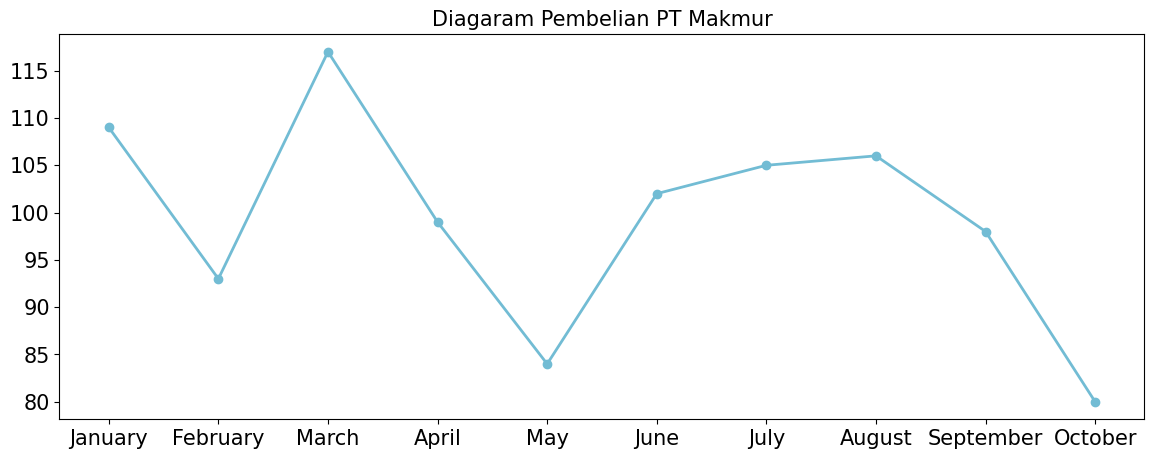

In [34]:
plt.figure(figsize=(14,5))
plt.plot(monthly_orders_df["order_date"],monthly_orders_df["order_count"],marker= 'o',linewidth = 2,color = "#72BCD4")
plt.title("Diagaram Pembelian PT Makmur",loc="center",fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

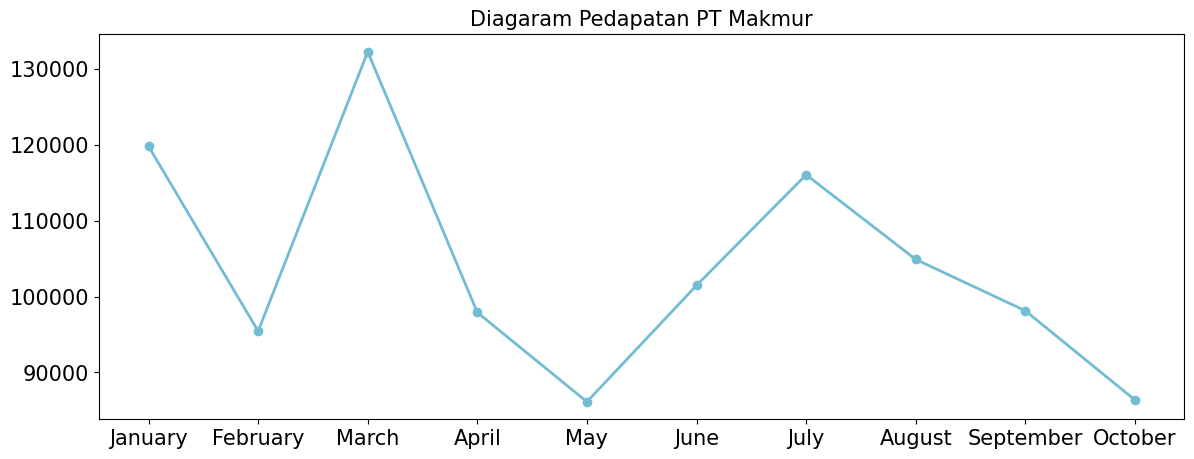

In [35]:
plt.figure(figsize=(14,5))
plt.plot(monthly_orders_df["order_date"],monthly_orders_df["revenue"],marker= 'o',linewidth = 2,color = "#72BCD4")
plt.title("Diagaram Pedapatan PT Makmur",loc="center",fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [36]:
sum_order_items_df = all_df.groupby(by="product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(20)

,product_name,quantity_x
0,Denim,530
1,Joggers,334
2,Bomber,321
3,Pleated,309
4,Puffer,308
5,Casual Slim Fit,307
6,Shearling,305
7,Relaxed Leg,301
8,Trench Coat,299
9,Chambray,290


C:\Users\admin\AppData\Local\Temp\ipykernel_12684\3139395743.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
C:\Users\admin\AppData\Local\Temp\ipykernel_12684\3139395743.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])


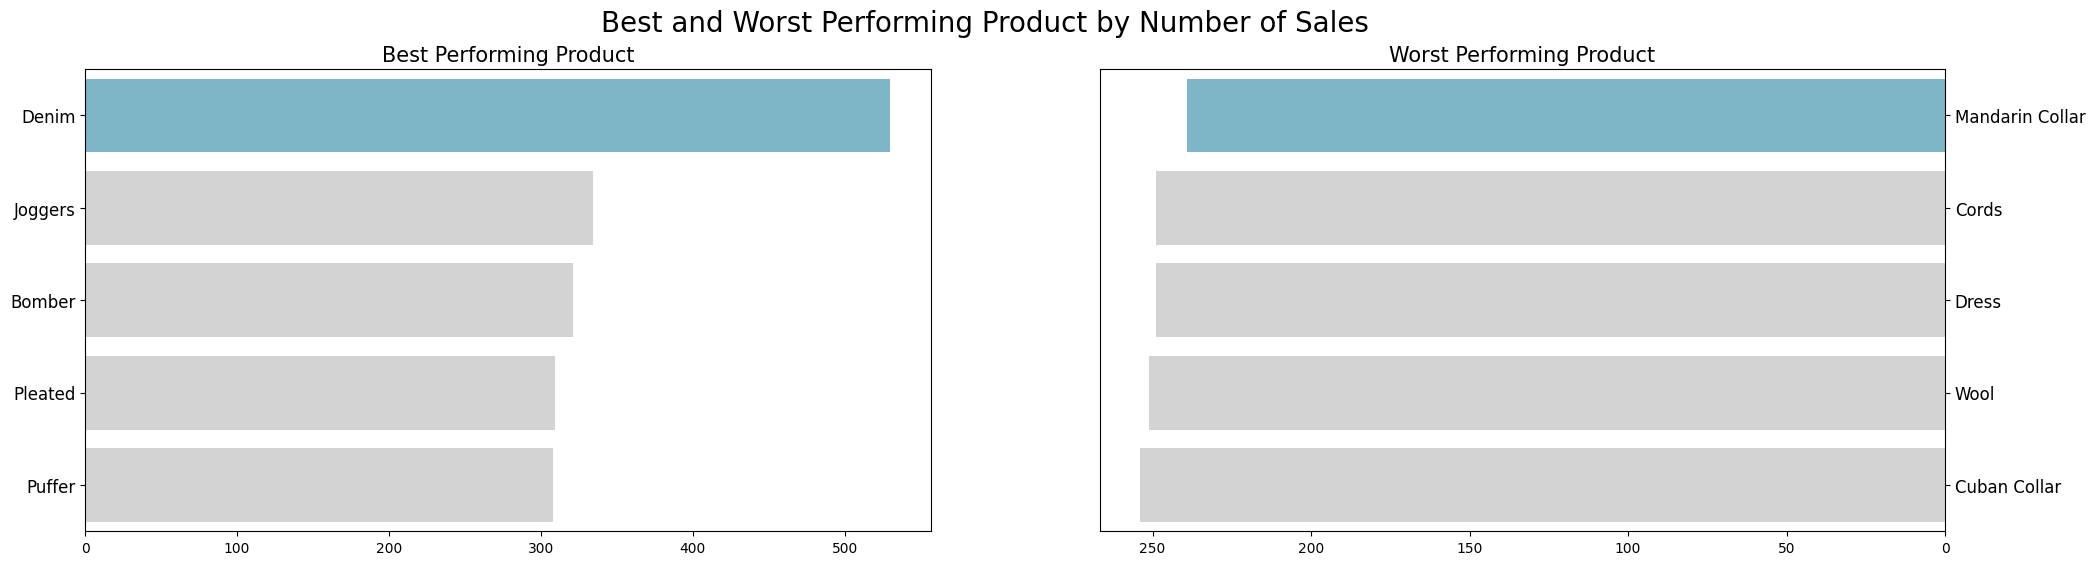

In [37]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (24,6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

## Bagaimana Demografi Pelanggan yang Kita Miliki?

C:\Users\admin\AppData\Local\Temp\ipykernel_12684\269230143.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\admin\AppData\Local\Temp\ipykernel_12684\269230143.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


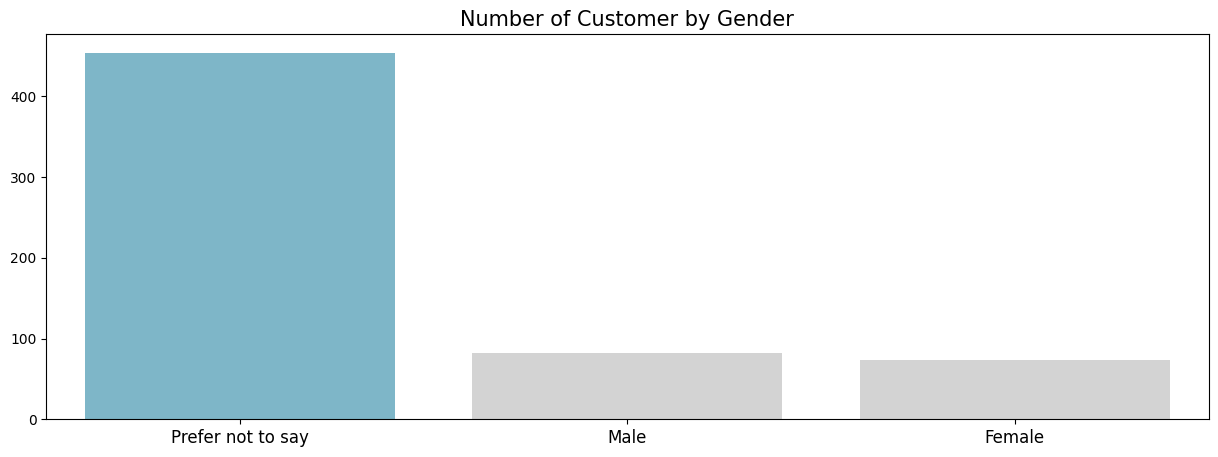

In [38]:
bygender_df = all_df.groupby(by="gender").customer_id.nunique().reset_index()
bygender_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bygender_df.head()
plt.figure(figsize=(15,5))
sns.barplot(
    y="customer_count",
    x = "gender",
    data= bygender_df.sort_values(by="customer_count",ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="x",labelsize = 12)

In [39]:
bystate_df = all_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False).reset_index()
bystate_df.rename(columns={
    "customer_id":"customer_count"
}, inplace=True)
bystate_df.head(10)

,state,customer_count
0,South Australia,90
1,Western Australia,80
2,Queensland,79
3,New South Wales,77
4,Northern Territory,75
5,Victoria,75
6,Australian Capital Territory,73
7,Tasmania,67


C:\Users\admin\AppData\Local\Temp\ipykernel_12684\2675487988.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


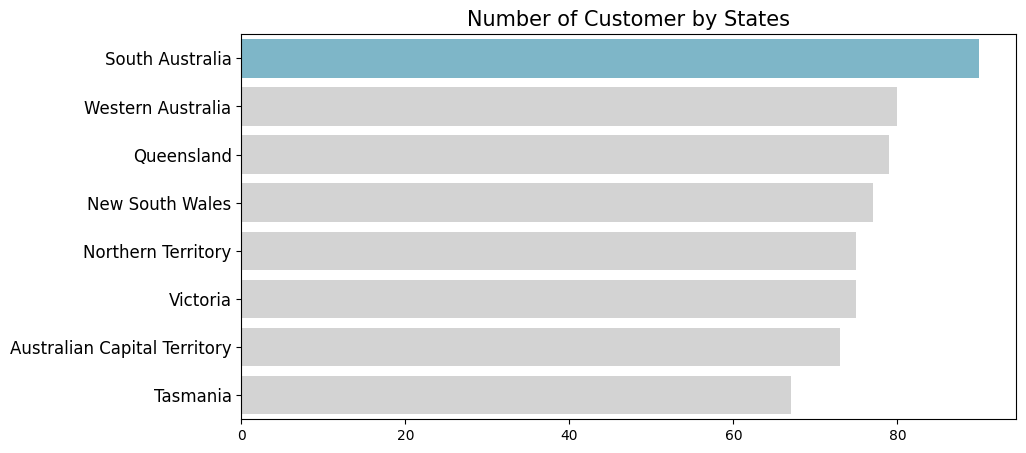

In [40]:
bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [41]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max",
    "order_id":"nunique",
    "total_price":"sum"
})
rfm_df.columns =["customer_id","max_order_time","frequency","monetory"]
rfm_df["max_order_time"] = rfm_df["max_order_time"].dt.date
recent_date = order_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_time"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_time",axis=1,inplace= True)
rfm_df.head()


,customer_id,frequency,monetory,recency
0,1,3,1641.0,203
1,7,1,1017.0,156
2,10,1,270.0,229
3,11,1,382.0,149
4,12,1,1272.0,127


C:\Users\admin\AppData\Local\Temp\ipykernel_12684\2839338386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "recency",x="customer_id",data=rfm_df.sort_values(by="recency",ascending=True).head(5),palette=colors,ax=ax[0])
C:\Users\admin\AppData\Local\Temp\ipykernel_12684\2839338386.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "frequency",x="customer_id",data=rfm_df.sort_values(by="frequency",ascending=False).head(5),palette=colors,ax=ax[1])
C:\Users\admin\AppData\Local\Temp\ipykernel_12684\2839338386.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

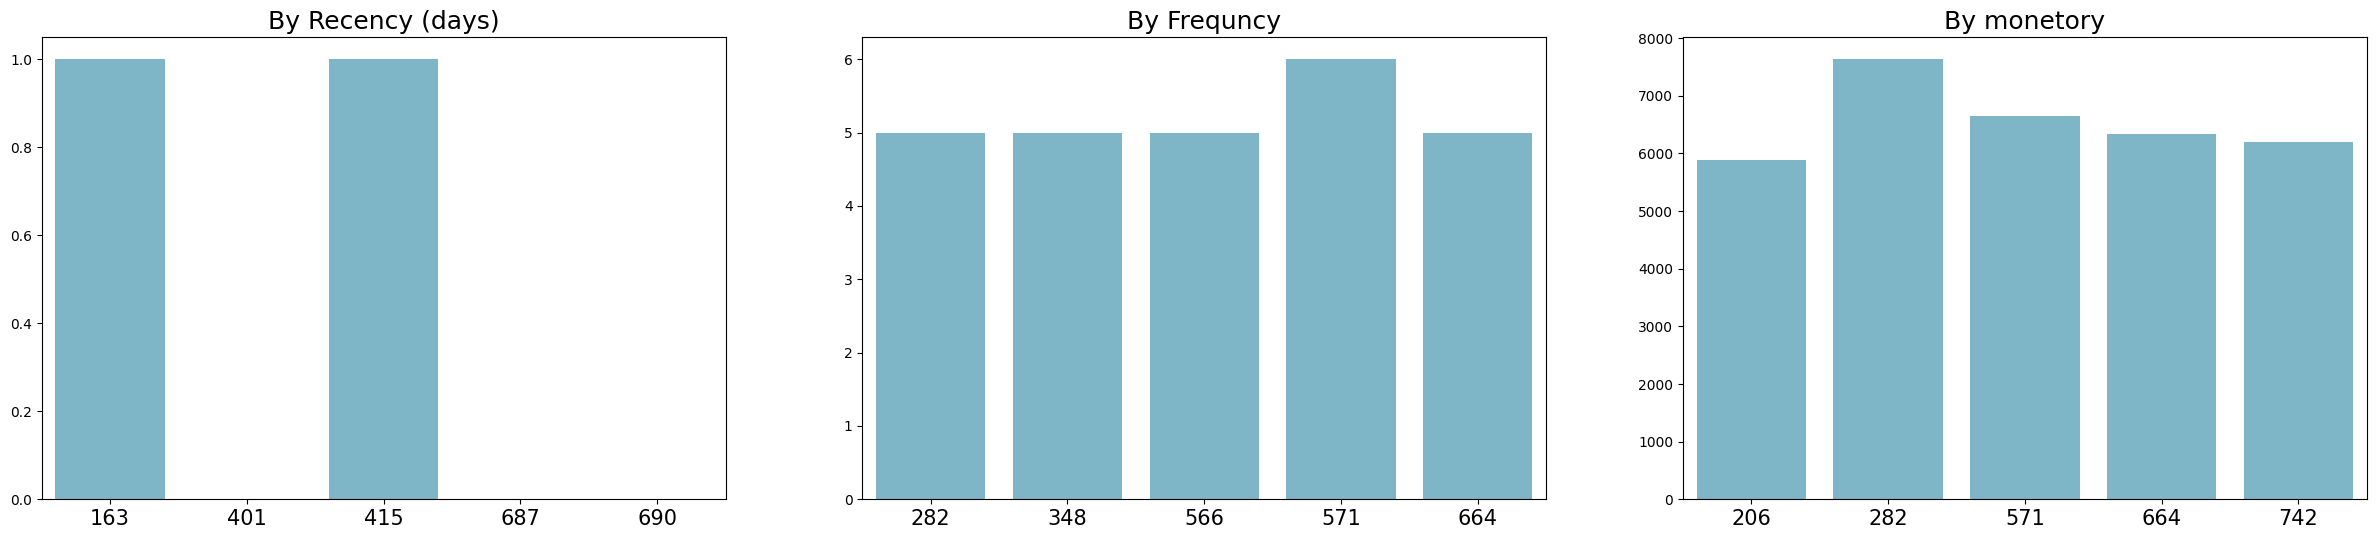

In [42]:
fig,ax = plt.subplots(nrows= 1,ncols= 3,figsize = (30,6))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
sns.barplot(y = "recency",x="customer_id",data=rfm_df.sort_values(by="recency",ascending=True).head(5),palette=colors,ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y = "frequency",x="customer_id",data=rfm_df.sort_values(by="frequency",ascending=False).head(5),palette=colors,ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequncy", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=15)

sns.barplot(y = "monetory",x="customer_id",data=rfm_df.sort_values(by="monetory",ascending=False).head(5),palette=colors,ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By monetory", loc="center", fontsize=18)
ax[2].tick_params(axis ='x', labelsize=15)

In [43]:
all_df.to_csv("all data.csv",index=False)